In [1]:
#import/install all packages at the top

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
import string

In [2]:
#import and read file in df with pandas (for better visualisation)

filename= "/Users/laure/OneDrive/Dokumente/VU/Python for Text Analysis/Final Assignment/irony-labeled.csv"

df = pd.read_csv(filename)

df.head()

,comment_text,label
0,I suspect atheists are projecting their desire...,-1
1,It's funny how the arguments the shills are ma...,-1
2,We are truly following the patterns of how the...,-1
3,air pressure dropping as altitude goes higher....,-1
4,Absolutely. I think we'd be hard pressed to f...,-1


In [3]:
#counts number of each class 
df["label"].value_counts()

-1    1412
 1     537
Name: label, dtype: int64

In [4]:
#rename the columns
df.columns = ["Comment_Text", "Label"]

In [5]:
#checking for any missing values
missing_data = df.isnull().sum()
missing_data

Comment_Text    0
Label           0
dtype: int64

In [6]:
print("This Irony dataset entails", len(df), "items")

This Irony dataset entails 1949 items


In [7]:
#Count number of ironic (1) and non-ironic (-1) comments in data

ironic = []
non_ironic = []

for x in df["Label"]:
    if x == 1:
        ironic.append(x)
    else:
        non_ironic.append(x)

print(f"The dataset enails a total of {len(ironic)} IRONIC comments") #27.55%
print(f"The dataset enails a total of {len(non_ironic)} NON-IRONIC comments") #72.45%
#537x100 / 1949 = 27.55%

The dataset enails a total of 537 IRONIC comments
The dataset enails a total of 1412 NON-IRONIC comments


# Split into Train (70), Validation (10) and Test (20) sets

-using scikit learn 'train_test_split' function twices gives the validation set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = df["Comment_Text"]
x = df["Label"]

#think this is the right way round.... !! 
#i.e. x = label, y = comment, but we may need to check haha

##double check and see top 5
# print(x.head())
# print(y.head())

In [10]:
#test and train sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

#split the training set to get validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=43)

In [11]:
#pandas concat joins series together (i.e. dataframes)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
val = pd.concat([X_val, y_val], axis=1)

print("The Train set entails:", len(train), "items") #70
print("The Test set entails:", len(test), "items")  #20
print("This Validation set entails:", len(val), "items")   #10

The Train set entails: 1364 items
The Test set entails: 390 items
This Validation set entails: 195 items


In [12]:
# pandas '.shape' to see dataframe in form of tuples (no. of rows / cols)

print("Training Data Shape:", train.shape)
print("Testing Data Shape:", test.shape)
print("Validation Data Shape:", val.shape)

Training Data Shape: (1364, 2)
Testing Data Shape: (390, 2)
Validation Data Shape: (195, 2)


# Summaries of the distribution of comments by both labels (i.e. non-ironic = -1, ironic = 1)

- use matplotlib to create THREE bar charts for visualisation for each of the sets:
        (1) Train
        (2) Validation
        (3) Test

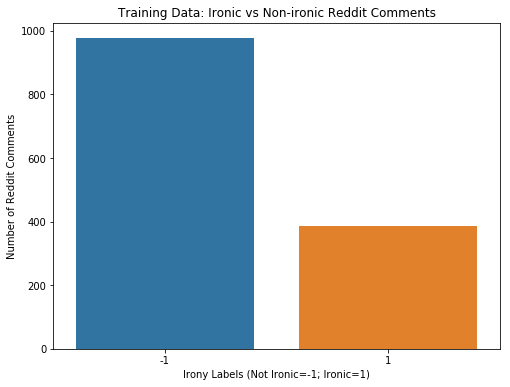

In [13]:
#TRAIN

fig = plt.figure(figsize=(8,6))
sns.barplot(x = train["Label"].unique(), 
            y=train["Label"].value_counts())

plt.title("Training Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

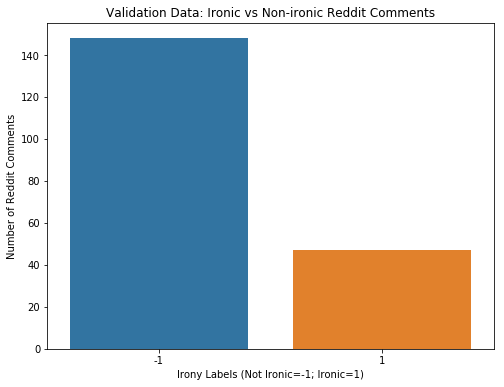

In [14]:
#VALIDATION

fig = plt.figure(figsize=(8,6))
sns.barplot(x = val["Label"].unique(), 
            y=val["Label"].value_counts())

plt.title("Validation Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

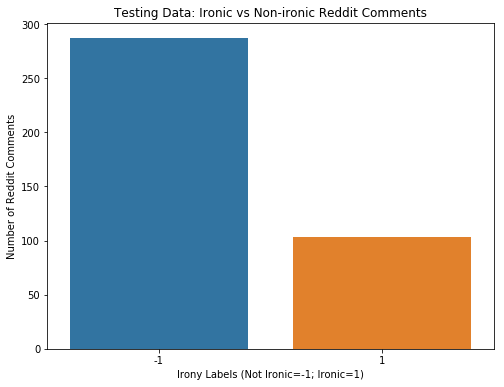

In [15]:
#TEST

fig = plt.figure(figsize=(8,6))
sns.barplot(x = test["Label"].unique(), 
            y=test["Label"].value_counts())

plt.title("Testing Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

In [16]:
#check format of train df

train.head()

,Label,Comment_Text
254,-1,Matthews must mistakenly think that if O'Reill...
331,1,Yep it is hard to get a good education and the...
1141,-1,/r/nottheonion
1642,-1,About. Fucking. Time.
1064,-1,The perimeters around this relaunching were ke...


# CHANGES FROM 21/01/2019 -
see below - stuff before deleted to follow the converting to string method we chatted about...

# Split train set into "Ironic" and "Not-ironic" dataframes, then convert each into a list of strings 
- converting after into list of strings to parse each comment with SpaCy

In [17]:
#Split the training set into Ironic and Not ironic, making 2 new dfs, with same headers
ironic_df = train[train["Label"] >= 1]
nonironic_df = train[train["Label"] <= -1]

print(f"Training data contains {len(ironic_df)} IRONIC comments")
print(f"Training data contains {len(nonironic_df)} NON- IRONIC comments")

Training data contains 387 IRONIC comments
Training data contains 977 NON- IRONIC comments


In [18]:
ironic_comments = ironic_df["Comment_Text"].values
non_ironic_comments = nonironic_df["Comment_Text"].values

print(type(ironic_comments))

<class 'numpy.ndarray'>


In [25]:
def convert_to_string(df_with_columnname):
    """Convert column of a dataframe into a string - remove headers and index and return entire string"""
    return df_with_columnname.to_string(index=False)

In [26]:
#convert both dfs to strings
ironic_train_str = convert_to_string(ironic_df["Comment_Text"])
nonironic_train_str = convert_to_string(nonironic_df["Comment_Text"])

#print(repr(ironic_train_str))
#print(repr(notironic_train_str))

In [27]:
#here need to remove \n, \t etcx = ironic_train_str.split("\\n\\n")
# x = ironic_train_str.split("\\n\\n")
# print(len(x))
# #xx = x.replace("\n", " ")

# print(xx)
#import re


#remove hyperlinks???? - or maybe do that later????????

# Parse through SpaCy to get STATS:

-----Create list of functions for each:
- average word length
- average sentence length
- number of word types

In [28]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [29]:
def nlp_convert(text):
    """Parse text with SpaCy"""
    doc = nlp(text)
    return doc

In [30]:
#could call nlp_convert in functions below or just leave as is

def average_word_length(doc):
    """Take doc and return average word length"""
    for token in doc:
        word = token.text
        average_word_length = sum(len(word) for word in doc) / len(doc)
    return(average_word_length)

def average_sent_length(doc):
    """Take doc and return average sentence length"""
    sent_list = []

    for sent in doc.sents:
        len_sent = len(sent)
        sent_list.append(len_sent)

    total = sum(sent_list)
    leng = len(sent_list)

    average_sent_length = total / leng
    return(average_sent_length)

In [31]:
def relative_count_wordtypes(doc):
    """Return relative count for all word types i.e. nouns, pronouns, verbs etc"""
    pos_tags = []
    for token in doc:
        pos_tags.append(token.pos_)
    return Counter(pos_tags)

# IRONIC RETURNS:

In [32]:
#parse through spacy
ir_doc = nlp_convert(ironic_train_str)
#print(repr(ir_doc))

#average stats (word & sent)
ir_average_wordlen = average_word_length(ir_doc)
ir_average_sentlength = average_sent_length(ir_doc)

#word type stats
ir_count_wordtypes = relative_count_wordtypes(ir_doc)

print(f"Average Word Length for the Ironic Corpus is: {ir_average_wordlen}")
print(f"Average Sentence Length for the Ironic Corpus is: {ir_average_sentlength}") 
print(f"Relative Count of Word Types for the Ironic Corpus is: \n {ir_count_wordtypes}")

Average Word Length for the Ironic Corpus is: 3.7517522043861633
Average Sentence Length for the Ironic Corpus is: 9.55291576673866
Relative Count of Word Types for the Ironic Corpus is: 
 Counter({'VERB': 710, 'PUNCT': 710, 'NOUN': 583, 'SPACE': 473, 'DET': 306, 'ADJ': 288, 'ADP': 284, 'PRON': 282, 'PROPN': 276, 'ADV': 247, 'PART': 76, 'CCONJ': 72, 'INTJ': 44, 'NUM': 38, 'X': 19, 'SYM': 15})


# NON-IRONIC RETURNS:

In [33]:
#parse through spacy
non_ir_doc = nlp_convert(nonironic_train_str)

#average stats (word & sent)
non_ir_average_wordlen = average_word_length(non_ir_doc)
non_ir_average_wordlen = average_sent_length(non_ir_doc)

#word type stats
non_ir_count_wordtypes = relative_count_wordtypes(non_ir_doc)

print(f"Average Word Length for the Non-ironic Corpus is: {non_ir_average_wordlen}")
print(f"Average Sentence Length for the Non-ironic Corpus is: {non_ir_average_wordlen}") 
print(f"Relative Count of Word Types for the Non-ironic Corpus is: \n {non_ir_count_wordtypes}")


Average Word Length for the Non-ironic Corpus is: 9.525021204410518
Average Sentence Length for the Non-ironic Corpus is: 9.525021204410518
Relative Count of Word Types for the Non-ironic Corpus is: 
 Counter({'VERB': 1822, 'PUNCT': 1767, 'NOUN': 1488, 'SPACE': 1209, 'DET': 933, 'ADP': 742, 'ADV': 741, 'PRON': 738, 'ADJ': 665, 'PROPN': 519, 'CCONJ': 196, 'PART': 175, 'NUM': 91, 'INTJ': 61, 'X': 51, 'SYM': 32})


# Python Class Visualisation 

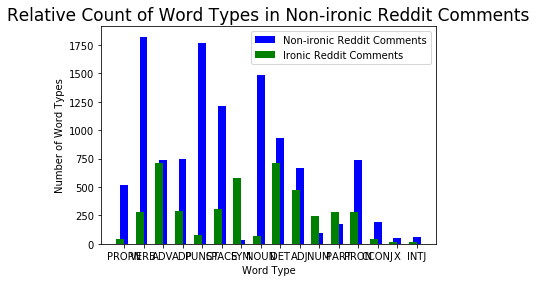

In [67]:
#dict 1  = non_ir_count_wordtypes
#dict 2  = ir_count_wordtypes

#create grouped bar chart
X = np.arange(len(non_ir_count_wordtypes))
ax = plt.subplot(111)
ax.bar(X, non_ir_count_wordtypes.values(), width=0.4, color='b', align='center')
ax.bar(X-0.2, ir_count_wordtypes.values(), width=0.4, color='g', align='center')
ax.legend(('Non-ironic Reddit Comments','Ironic Reddit Comments'))
plt.xticks(X, non_ir_count_wordtypes.keys())


plt.title("Relative Count of Word Types in Non-ironic Reddit Comments", fontsize = 17)
plt.ylabel("Number of Word Types")
plt.xlabel("Word Type")


plt.savefig("Relative_word_counts.png")


In [34]:
from matplotlib.pyplot import figure

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


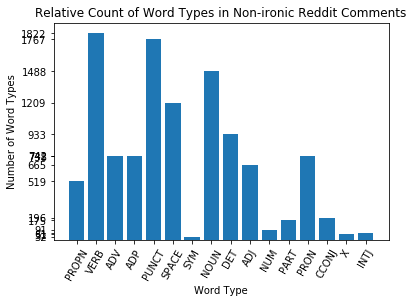

In [68]:
non_ir_wordtype = []
non_ir_number = []

for x in non_ir_count_wordtypes:
    non_ir_wordtype.append(x)
    non_ir_number.append(non_ir_count_wordtypes[x])


x = np.arange(len(non_ir_count_wordtypes))
print(x)
plt.bar(x, non_ir_number)
plt.xticks(x, non_ir_wordtype, rotation=60)
plt.yticks(non_ir_number)

plt.title("Relative Count of Word Types in Non-ironic Reddit Comments")
plt.ylabel("Number of Word Types")
plt.xlabel("Word Type")

plt.savefig("Non-ironic relative_word_counts.png")
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


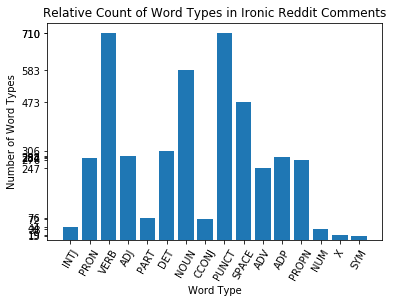

In [70]:
ir_wordtype = []
ir_number = []

for x in ir_count_wordtypes:
    ir_wordtype.append(x)
    ir_number.append(ir_count_wordtypes[x])
    
x = np.arange(len(ir_count_wordtypes))
print(x)
plt.bar(x, ir_number)
plt.xticks(x, ir_wordtype, rotation=60)
plt.yticks(ir_number)

plt.title("Relative Count of Word Types in Ironic Reddit Comments")
plt.ylabel("Number of Word Types")
plt.xlabel("Word Type")



# fig  = plt.figure(figsize=(10,40),dpi=200, facecolor = 'red')
plt.savefig("Ironic relative_word_counts.png")
plt.show(fig)

# SpaCy Continued: Text Processing 

- stopwords, punctuation, lemmatize

- (need to run named entity recognition AND sentiment analysis)

[sentiment analysis - ironic ones should typically be more negative....]

In [40]:
spacy.explain("nsubj")

'nominal subject'

In [41]:
#\\n\\n between comments 

def get_tokens(text):
    """Tokenize text at word level and return the list"""
    token_list = []
    for token in text:
        word = token.text
        token_list.append(word)
#         print(word.text, word.lemma_, word.pos_, word.tag_, word.dep_, word.shape_, word.is_alpha, word.is_stop)
    return token_list

In [42]:
#get list of tokens for each:

ir_tokens = get_tokens(ir_doc) #ironic
non_ir_tokens = get_tokens(non_ir_doc) #non-ironic

# print(len(ir_tokens))
# print(len(non_ir_tokens))

print(ir_tokens)

['Yep', 'it', 'is', 'hard', 'to', 'get', 'a', 'good', 'education', 'and', 'the', '...', '\n', 'So', 'the', 'question', 'during', 'their', 'Twitter', 'Q&amp;A', 'a', '...', '\n                    ', 'They', 'hate', 'us', 'for', 'our', 'freedom', '.', '\n', 'Did', 'he', 'talk', 'at', 'all', 'about', 'how', 'he', 'places', 'persona', '...', '\n', '&', 'gt', ';', '"', 'Here', "'s", 'a', 'picture', 'of', 'my', 'house"\\n\\nOh', '?', ' ', 'yo', '...', '\n', 'Hell', 'the', 'KochGangsters', 'bought', 'Wisconsin', 'they', 'd', '...', '\n', 'Hey', ',', 'in', 'his', 'defense', 'the', 'original', 'constitution', '...', '\n', 'It', 'would', 'have', 'been', 'nice', 'for', 'the', 'photo', 'to', 'be', 'ca', '...', '\n                          ', 'Well', 'let', 'me', 'tell', 'you', '...', '\n', 'Takers', 'come', 'in', 'all', 'forms', '.', '   ', 'Vets', '.', '  ', 'Welfare', 'q', '...', '\n', 'Only', 'to', 'keep', 'them', 'from', 'being', 'embarrassed', ',', 'beca', '...', '\n', 'I', 'wish', '.', ' ', 

# PUNCT COUNTS COMPARISON


In [43]:
#PUNCTUATION COUNTS

ir_count = Counter(ir_tokens) 
non_ir_count = Counter(non_ir_tokens)

In [44]:
def get_punct_counts(collection_counter):
    """Insert collections.counter (from tokens), return list of punctuation with counter"""
    dictx = {}
    for punc in string.punctuation:
        if punc not in dictx:
            dictx[punc] = collection_counter[punc]
        else:
            pass
    return dictx

In [45]:
ir_pun_dict = get_punct_counts(ir_count)
non_ir_pun_dict = get_punct_counts(non_ir_count)

print(ir_pun_dict)
print(non_ir_pun_dict)

{'!': 30, '"': 34, '#': 0, '$': 6, '%': 5, '&': 16, "'": 5, '(': 0, ')': 1, '*': 21, '+': 0, ',': 107, '-': 14, '.': 113, '/': 7, ':': 13, ';': 7, '<': 0, '=': 3, '>': 0, '?': 29, '@': 0, '[': 2, '\\': 1, ']': 0, '^': 0, '_': 1, '`': 0, '{': 0, '|': 0, '}': 0, '~': 0}
{'!': 17, '"': 78, '#': 1, '$': 7, '%': 6, '&': 47, "'": 12, '(': 21, ')': 7, '*': 22, '+': 1, ',': 239, '-': 25, '.': 282, '/': 20, ':': 13, ';': 41, '<': 0, '=': 0, '>': 0, '?': 72, '@': 0, '[': 33, '\\': 1, ']': 17, '^': 0, '_': 0, '`': 0, '{': 0, '|': 0, '}': 0, '~': 0}


In [46]:
#convert dictionaries into pandas df for better visualisation/comparison
df_punct = pd.DataFrame(ir_pun_dict, index=["Ironic Comments", "Non-ironic Comments"])
df_punct.iloc[1] = non_ir_pun_dict

df_punct

##see if can switch round (columns vs rows)

#how to get an average

,!,"""",#,$,%,&,',(,),*,...,[,\,],^,_,`,{,|,},~
Ironic Comments,30,34,0,6,5,16,5,0,1,21,...,2,1,0,0,1,0,0,0,0,0
Non-ironic Comments,17,78,1,7,6,47,12,21,7,22,...,33,1,17,0,0,0,0,0,0,0


In [51]:
ax = sns.barplot(x="#" ,y="index",color='lightsteelblue',data=df)

ValueError: Could not interpret input '#'

In [47]:
# stopwords = list(STOP_WORDS)
# stopwords

In [ ]:
def get_entities(doc):
    for ent in doc.ents:
        print(f"Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}")
        
#     d = {}
#     for ent in doc.ents:
#         if ent not in d:
#             d["Entity"] = [ent]
#             d["Label"] = ent.label_
#             d["Explain"] = spacy.explain(ent.label_)
#         else:
#             pass
#     return d

In [ ]:
ir_ents = get_entities(ir_doc)
non_ir_ents = get_entities(non_ir_doc)
print(ir_ents)

#print(type(non_ir_ents))

##want to convert to pandas df after BUT CANT DO THIS DICT GRRRR

In [ ]:
#Check this out below! i've hashtagged it as its long but if you download the file and unhashtag it, it automatically does the NER for you and visualises it sick!

In [ ]:
ir_ent_visual = spacy.displacy.render(ir_doc, style="ent", jupyter=True)

In [ ]:
non_ir_ent_visual = spacy.displacy.render(non_ir_doc, style="ent", jupyter=True)

In [ ]:
#get PERSON names

def get_PERSON_names(doc):
    PERSON_names = set()
    for token in doc:
        if token.ent_type_ == "PERSON":
            PERSON_names.add(token)
        else:
            pass
    return PERSON_names

In [ ]:
ir_PERSON = get_PERSON_names(ir_doc)
non_ir_PERSON = get_PERSON_names(non_ir_doc)

print(non_ir_PERSON)